<a href="https://colab.research.google.com/github/guptaa98/Kaggle-Notebooks/blob/master/Retail_Pulse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
from google.colab import drive, files
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [101]:
df = pd.read_excel('/content/drive/MyDrive/RetailPulseAssignmentData.xlsx')

# 1. Reading the data

In [102]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.1 Reading basic stats of data

In [103]:
df.shape

(525461, 8)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [105]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [106]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


* We can see that Quantity and Price have negative values which is not possible in real life. 
* There is a possibility that these two features contains outliers.

## 1.3 Checking for missing values

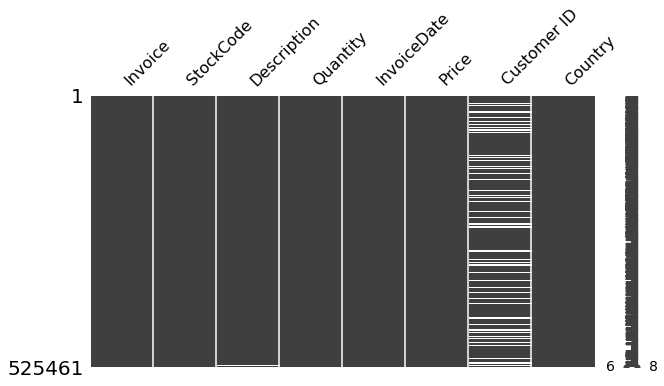

In [107]:
import missingno
missingno.matrix(df, figsize=(10,5))

We can see that Customer Id feature contains a lot of missing values.

## 1.4 Check for duplicate records in dataframe

In [108]:
df.duplicated().sum()

6865

* 6865 duplicate records 
* drop the duplicate records

In [109]:
print(df[df.duplicated()].head())

    Invoice StockCode  ... Customer ID         Country
371  489517     21912  ...     16329.0  United Kingdom
383  489517     22130  ...     16329.0  United Kingdom
384  489517     22319  ...     16329.0  United Kingdom
385  489517     21913  ...     16329.0  United Kingdom
386  489517     21821  ...     16329.0  United Kingdom

[5 rows x 8 columns]


In [111]:
df.shape

(525461, 8)

In [112]:
df.drop_duplicates(inplace = True)

In [114]:
df.shape

(518596, 8)

In [116]:
df.duplicated().sum()

0

# 2. Univariate Analysis of every feature

### 2.1 Invoice 

In [117]:
df.Invoice.value_counts()

537434     675
538071     652
537638     601
537237     597
536876     593
          ... 
C494793      1
498341       1
C490931      1
C516159      1
C515991      1
Name: Invoice, Length: 28816, dtype: int64

* If Invoice Code starts from 'C' then it refers to cancellation of that order.

In [119]:
noc = 0
indices = []
for index, row in df.iterrows():
  invoice = row['Invoice']
  invoice = str(invoice)
  if (invoice[0] == 'C'):
    noc += 1
    indices.append(index)
    #df.drop(index)

#print(df.shape)

In [121]:
indices[0:10]

[178, 179, 180, 181, 182, 183, 184, 185, 186, 196]

In [122]:
print(noc)

10182


* There are total 10182 orders cancelled. 

In [123]:
df.drop(indices,inplace = True,axis = 0)

* We've removed such records.

In [125]:
df.shape

(508414, 8)

### 2.2 Quantity

In [126]:
df['Quantity'].describe()

count    508414.000000
mean         11.066713
std         105.046657
min       -9600.000000
25%           1.000000
50%           3.000000
75%          12.000000
max       19152.000000
Name: Quantity, dtype: float64

In [127]:
len(df[df['Quantity'] < 0 ])

2121

* We can see that there are total 2121 items whose quantities are negative, which means they were cancelled. 
* We'll Remove such records

In [130]:
indices = []
for index, row in df.iterrows():
  if (row['Quantity'] < 0):
    indices.append(index)
    #df.drop(index)
#print(df.shape)

In [131]:
indices[0:10]

[263, 283, 284, 470, 3114, 3162, 3168, 4296, 4538, 4566]

In [132]:
df.drop(indices,inplace = True,axis = 0)

In [133]:
df.shape

(506293, 8)

### 2.3 StockCode

In [134]:
df.StockCode.value_counts()

85123A    3376
22423     2036
85099B    2002
21212     1887
21232     1679
          ... 
84630        1
72759        1
35837        1
84648        1
21029        1
Name: StockCode, Length: 4317, dtype: int64

### 2.4 Price

In [137]:
len(df[df['Price'] < 0 ])

3

In [138]:
indices = []
for index, row in df.iterrows():
  if (row['Price'] < 0):
    indices.append(index)

In [139]:
df.drop(indices,inplace = True,axis = 0)

In [140]:
df.shape

(506290, 8)

In [141]:
print(df['Price'].min())
print(df['Price'].max())

0.0
25111.09


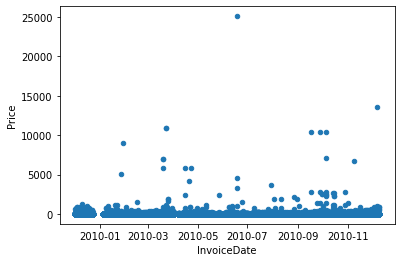

In [142]:
df.plot(kind='scatter', y='Price',x='InvoiceDate') ;
plt.show()

* One of the conclusions that can be drawn is that we can see very high value of Prices during the year end. 

### 2.4 Country

In [143]:
df.Country.value_counts()

United Kingdom          468152
EIRE                      9451
Germany                   7652
France                    5514
Netherlands               2729
Spain                     1228
Switzerland               1170
Portugal                  1058
Belgium                   1037
Sweden                     886
Channel Islands            821
Italy                      708
Australia                  630
Cyprus                     533
Austria                    524
Greece                     512
Denmark                    418
United Arab Emirates       399
Norway                     365
Finland                    347
Unspecified                306
USA                        230
Poland                     182
Malta                      170
Japan                      164
Lithuania                  154
Singapore                  117
RSA                        110
Bahrain                    106
Canada                      77
Thailand                    76
Israel                      74
Hong Kon

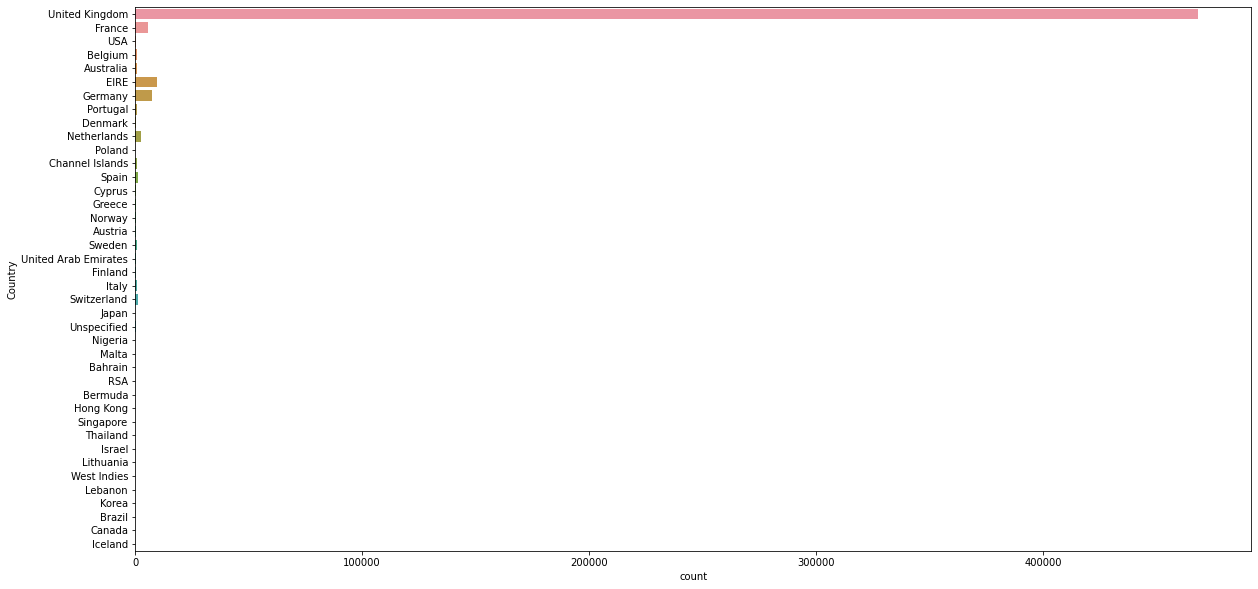

In [144]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y='Country',data = df);


### 2.5 Customer ID

In [145]:
df['Customer ID'].isnull().sum()

105343

* We'll remove the records which contain null value for Customer ID as it is unique and there's no way to replace them. 

In [146]:
df.shape

(506290, 8)

In [147]:
df.dropna(inplace = True)

In [148]:
df.shape

(400947, 8)

In [149]:
df['Customer ID'].value_counts()

14911.0    5568
17841.0    4944
14606.0    3802
14156.0    2646
12748.0    2532
           ... 
14495.0       1
16737.0       1
16219.0       1
14906.0       1
13270.0       1
Name: Customer ID, Length: 4314, dtype: int64

* Customer ID refers to the id of a single customer. 
* Customer with ID = 14911 occurs max number of time. 
* It can be inferred that this customer has done maximum purchasing in the store.

In [150]:
df[df['Customer ID'] == 14911].InvoiceDate.value_counts()

2010-10-03 12:40:00    112
2010-05-09 12:49:00    106
2010-06-14 14:06:00    101
2010-10-27 13:29:00     89
2010-03-30 09:47:00     79
                      ... 
2010-03-24 10:42:00      1
2010-12-06 13:32:00      1
2010-01-08 10:39:00      1
2010-08-19 14:24:00      1
2010-10-22 09:45:00      1
Name: InvoiceDate, Length: 204, dtype: int64

* There are 204 different dates when the customer with id = 14911 has engaged with store.


In [151]:
df[df['Customer ID'] == 14911]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440,489520,35751C,PURPLE CURRENT CANDLE RING,12,2009-12-01 11:41:00,0.75,14911.0,EIRE
441,489520,72739B,WHITE CHOCOLATE SCENT CANDLE,12,2009-12-01 11:41:00,1.25,14911.0,EIRE
442,489520,22114,HOT WATER BOTTLE TEA AND SYMPATHY,8,2009-12-01 11:41:00,3.95,14911.0,EIRE
443,489520,22212,FOUR HOOK WHITE LOVEBIRDS,6,2009-12-01 11:41:00,2.10,14911.0,EIRE
444,489520,21523,FANCY FONT HOME SWEET HOME DOORMAT,2,2009-12-01 11:41:00,6.75,14911.0,EIRE
...,...,...,...,...,...,...,...,...
523021,538009,21754,HOME BUILDING BLOCK WORD,3,2010-12-09 12:17:00,5.95,14911.0,EIRE
523022,538009,22840,ROUND CAKE TIN VINTAGE RED,2,2010-12-09 12:17:00,7.95,14911.0,EIRE
523023,538009,22842,BISCUIT TIN VINTAGE RED,2,2010-12-09 12:17:00,6.75,14911.0,EIRE
523024,538009,22197,SMALL POPCORN HOLDER,36,2010-12-09 12:17:00,0.85,14911.0,EIRE


* From the above, it can be observed that customer with id = 14911 has done the transactions in both the years 2009 and 2010.
* **Loyal Customer** - how willing a customer is to engage with and repeatedly purchase from you versus your competitors.
* Customer with Customer ID = 14911 can be called most loyal customer as he/she engaged with the store for both the years given in data.

### 2.6 InvoiceDate

In [152]:
df.InvoiceDate.value_counts()

2010-03-07 15:34:00    251
2010-05-07 09:04:00    250
2010-10-08 12:14:00    240
2010-06-08 16:47:00    240
2010-06-06 12:13:00    236
                      ... 
2010-02-02 14:11:00      1
2010-09-16 10:17:00      1
2010-08-15 11:12:00      1
2010-06-11 15:23:00      1
2010-07-09 12:17:00      1
Name: InvoiceDate, Length: 18010, dtype: int64

In [153]:
date_dict = df.InvoiceDate.value_counts()

In [154]:
date_dict[0:20]

2010-03-07 15:34:00    251
2010-05-07 09:04:00    250
2010-10-08 12:14:00    240
2010-06-08 16:47:00    240
2010-06-06 12:13:00    236
2010-11-07 16:29:00    228
2010-10-07 16:48:00    226
2010-11-28 14:57:00    215
2010-11-21 13:13:00    202
2010-05-16 16:05:00    201
2010-11-15 14:26:00    200
2010-01-07 11:52:00    199
2010-11-21 14:10:00    199
2010-10-07 10:39:00    190
2010-07-01 11:59:00    186
2010-06-22 14:21:00    184
2010-10-26 16:47:00    182
2010-05-16 12:51:00    180
2010-10-17 16:17:00    173
2010-10-05 14:05:00    172
Name: InvoiceDate, dtype: int64

From above we can say that the year end of 2009 and 2010 are the most popular time of the year based on this data.

In [155]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [156]:
#df['month'] = df['InvoiceDate'].dt.month
#df['year'] = df['InvoiceDate'].dt.year
#df['day'] = df['InvoiceDate'].dt.day
#df.head()

In [157]:
#df['hour'] = df['InvoiceDate'].dt.hour
#df['minute'] = df['InvoiceDate'].dt.minute
#df['second'] = df['InvoiceDate'].dt.second
#df.head()

In [158]:
#df['Dates'] = pd.to_datetime(df['InvoiceDate']).dt.date
#df['Time'] = pd.to_datetime(df['InvoiceDate']).dt.time

In [159]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


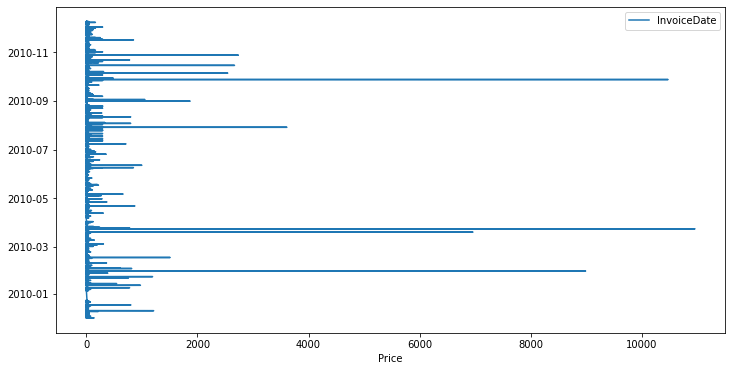

In [160]:
df.plot(y = 'InvoiceDate', x = 'Price', figsize = (12,6))

* Yes, according to the graph above, we can see seasonality in data based on Date

Conclusion
* Higher value of prices during the year end.
* During the year end the two main events like Christmas and New Year are observed. 


### 2.7 Description

In [163]:
desc_dict = df.Description.value_counts()

In [164]:
desc_dict[0:20]

WHITE HANGING HEART T-LIGHT HOLDER    3107
REGENCY CAKESTAND 3 TIER              1696
STRAWBERRY CERAMIC TRINKET BOX        1372
ASSORTED COLOUR BIRD ORNAMENT         1355
HOME BUILDING BLOCK WORD              1192
PACK OF 72 RETRO SPOT CAKE CASES      1183
60 TEATIME FAIRY CAKE CASES           1169
REX CASH+CARRY JUMBO SHOPPER          1099
JUMBO BAG RED RETROSPOT               1075
LUNCH BAG RED SPOTTY                  1069
HEART OF WICKER LARGE                 1027
WOODEN FRAME ANTIQUE WHITE            1021
RED HANGING HEART T-LIGHT HOLDER      1013
LUNCH BAG  BLACK SKULL.                996
JUMBO STORAGE BAG SUKI                 974
LUNCH BAG SUKI  DESIGN                 970
LOVE BUILDING BLOCK WORD               965
PACK OF 60 PINK PAISLEY CAKE CASES     946
JUMBO SHOPPER VINTAGE RED PAISLEY      930
LUNCH BAG SPACEBOY DESIGN              920
Name: Description, dtype: int64

* top 20 items that were sold.


## Segmenting the customers

To segmenting customer, there are some metrics that we can use, known as RFM
* Recency(R) -  when did the customer buy the product for last time
* Frequency(F) - how frequent the customer buy the product
* Monetary(M) - how much the customer pays for the product

In [165]:
df_seg = pd.DataFrame()

In [166]:
df_seg['InvoiceDate'] = df['InvoiceDate'].dt.date
df_seg['TotalSum'] = df['Quantity'] * df['Price']

In [167]:
df_seg['Customer ID'] = df['Customer ID']

In [168]:
df_seg['Invoice'] = df['Invoice']

In [169]:
df_seg.head()

,InvoiceDate,TotalSum,Customer ID,Invoice
0,2009-12-01,83.4,13085.0,489434
1,2009-12-01,81.0,13085.0,489434
2,2009-12-01,81.0,13085.0,489434
3,2009-12-01,100.8,13085.0,489434
4,2009-12-01,30.0,13085.0,489434


In [170]:
import datetime
reference_date = max(df_seg.InvoiceDate) + datetime.timedelta(days=1)

In [171]:
reference_date

datetime.date(2010, 12, 10)

In [173]:
max(df_seg.InvoiceDate)

datetime.date(2010, 12, 9)

In [174]:
#df[df['Customer ID'] == 12346]['Quantity']

In [175]:
customers = df_seg.groupby(['Customer ID']).agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'Invoice': 'count',
    'TotalSum': 'sum'})

In [176]:
customers.head()

,InvoiceDate,Invoice,TotalSum
Customer ID,,,
12346.0,165,33,372.86
12347.0,3,71,1323.32
12348.0,74,20,222.16
12349.0,43,102,2671.14
12351.0,11,21,300.93


In [181]:
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'Invoice': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [182]:
customers.head()

,Recency,Frequency,MonetaryValue
Customer ID,,,
12346.0,165,33,372.86
12347.0,3,71,1323.32
12348.0,74,20,222.16
12349.0,43,102,2671.14
12351.0,11,21,300.93


In [179]:
customers.shape

(4314, 3)

#### Recency vs Frequency 

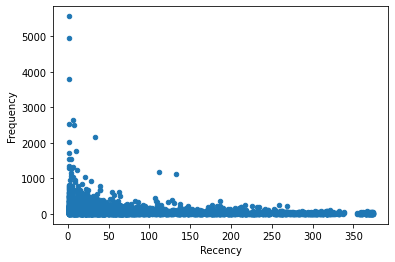

In [184]:
customers.plot(kind='scatter', x='Recency', y='Frequency') 
plt.show()

* Customers purchase more when their recency is less.

#### MonetaryValue vs Frequency

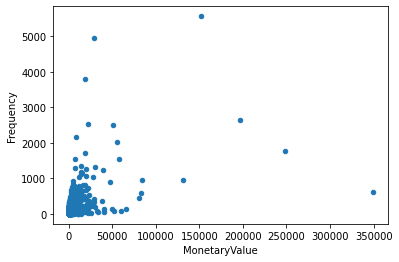

In [185]:
customers.plot(kind='scatter', x='MonetaryValue', y='Frequency') 
plt.show()

* Customers who buy frequently spend less amount of money. 

**How will we segment customers?**


* We can bucket the customers based on the above 3 Factors(RFM).
For example, put all the customers whose Recency is less than 60 days in 1 bucket. Similarly, customers whose Recency is greater than 60 days and less than 120 days in another bucket. We will apply the same concept for Frequency and Monetary also.

* The ideal customers for e-commerce companies are generally the most recent ones compared to the date of study(our reference date) who are very frequent and who spend enough.

* Based on the RFM Values, a score is assigned to each customer between 1 and 3.
* 3 is the best score and 1 is the worst score.

In [187]:
customers.describe()

,Recency,Frequency,MonetaryValue
count,4314.000000,4314.000000,4314.000000
mean,91.269819,92.940890,2039.460766
std,96.944304,198.883579,8909.797773
min,1.000000,1.000000,0.000000
25%,18.000000,18.000000,307.105000
50%,53.000000,43.000000,700.405000
75%,136.000000,100.000000,1713.297500
max,374.000000,5568.000000,349164.350000


In [188]:
print(374/3)
print(5568/3)
print(349164/3)

124.66666666666667
1856.0
116388.0


In [189]:
def R_Score(x):
  if (x['Recency'] < 60):
    recency = 1
  elif (x['Recency'] >= 60 and x['Recency'] <=120):
    recency = 2
  else:
    recency = 1
  return recency

customers['R'] = customers.apply(R_Score,axis=1)

In [192]:
def F_Score(x):
  if (x['Frequency'] <= 1856):
    frequency = 3
  elif (x['Frequency'] > 1856 and x['Frequency'] <= 3712):
    frequency = 2
  else:
    frequency = 1
  return frequency

customers['F'] = customers.apply(F_Score,axis=1)

In [194]:
def M_Score(x):
  if (x['MonetaryValue'] <= 116388):
    mv = 1
  elif (x['MonetaryValue'] > 116388 and x['MonetaryValue'] <= 232776):
    mv = 2
  else:
    mv = 3
  return mv

customers['M'] = customers.apply(M_Score,axis=1)

In [195]:
customers.head()

,Recency,Frequency,MonetaryValue,R,F,M
Customer ID,,,,,,
12346.0,165,33,372.86,1,3,1
12347.0,3,71,1323.32,1,3,1
12348.0,74,20,222.16,2,3,1
12349.0,43,102,2671.14,1,3,1
12351.0,11,21,300.93,1,3,1


In [198]:
def RFM_Score(x):
  return (str(x['R']) + str(x['F']) + str(x['M']))
customers['RFM_Score'] = customers.apply(RFM_Score,axis=1)

In [199]:
customers.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
Customer ID,,,,,,,
12346.0,165,33,372.86,1,3,1,131
12347.0,3,71,1323.32,1,3,1,131
12348.0,74,20,222.16,2,3,1,231
12349.0,43,102,2671.14,1,3,1,131
12351.0,11,21,300.93,1,3,1,131


In [204]:
customers.reset_index(inplace = True)

In [205]:
customers.head()

,Customer ID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
0,12346.0,165,33,372.86,1,3,1,131
1,12347.0,3,71,1323.32,1,3,1,131
2,12348.0,74,20,222.16,2,3,1,231
3,12349.0,43,102,2671.14,1,3,1,131
4,12351.0,11,21,300.93,1,3,1,131


In [225]:
segment = [0] * len(customers)

for i in range(0,len(customers)):
  if customers['RFM_Score'][i]=='111':
    segment[i]='Lost Cheap Customers'
  elif customers['RFM_Score'][i]=='133':
    segment[i]='Lost Customers'
  elif customers['RFM_Score'][i]=='233':
    segment[i]='Almost Lost Customers'
  elif customers['RFM_Score'][i]=='333':
    segment[i]='Best Customers'
  elif(customers['RFM_Score'][i] == '121' or customers['RFM_Score'][i] == '131'):
    segment[i] = 'Loyal Customers'
  elif(customers['RFM_Score'][i] == '123'  or customers['RFM_Score'][i] == '223' or customers['RFM_Score'][i] == '323' or customers['RFM_Score'][i] == '113' or customers['RFM_Score'][i] == '213' or customers['RFM_Score'][i] == '313'):
    segment[i] = 'Big Spenders'  
  else:
    segment[i] = 'Others'


In [227]:
customers['Segment'] = segment
customers.head()

,Customer ID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,Segment
0,12346.0,165,33,372.86,1,3,1,131,Loyal Customers
1,12347.0,3,71,1323.32,1,3,1,131,Loyal Customers
2,12348.0,74,20,222.16,2,3,1,231,Others
3,12349.0,43,102,2671.14,1,3,1,131,Loyal Customers
4,12351.0,11,21,300.93,1,3,1,131,Loyal Customers
